In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import scipy.io
import math
import numpy as np

In [14]:
def findSSE(X, numberOfClusters, IDX, C):
    numberOfRows, numberOfColumns = X.shape
    sse = 0.0
    #OR numberOfClusters = len(set(IDX)), RETURNS THE NUMBER OF CLUSTERS
    for i in range(numberOfClusters):
        for j in range(numberOfRows):
            if IDX[j] == i:
                sse = sse + math.dist(X[j], C[i])**2
    return sse

In [15]:
def showPlot(X,IDX,C):

    plt.plot(X[IDX==0][:,0], X[IDX==0][:,1],'limegreen', marker='o', linewidth=0, label='C1')
    plt.plot(X[IDX==1][:,0], X[IDX==1][:,1],'yellow', marker='o', linewidth=0, label='C2')
    plt.plot(X[IDX==2][:,0], X[IDX==2][:,1],'c', marker='o', linewidth=0, label='C3')
    plt.scatter(C[:,0], C[:,1] , marker='x', color='black', s=150, linewidth=3, label='Centroids',zorder=10)
    plt.legend()
    plt.show()
    

In [16]:
#υλοποιεί συσταδοποίηση με διαφορετικά k και υπολογίζει κάθε φορα τον συντελεστη σιλουετας και sse
def findK(X): 
    
    K=[]
    SSE_score=[]
    silh=[]
    for k in range(2,11):  #k=2 - k=10
        
        K.append(k)
        kmeans= KMeans(n_clusters=k).fit(X)
        IDX= kmeans.labels_
        C= kmeans.cluster_centers_
        SSE_score.append(findSSE(X,k,IDX, C))
        silh.append(metrics.silhouette_score(X,IDX))
        
        
    plt.plot(K, SSE_score, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('SSE')
    plt.show()
    plt.plot(K, silh, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('silhouette_score')
    plt.show()

# Iris Dataset

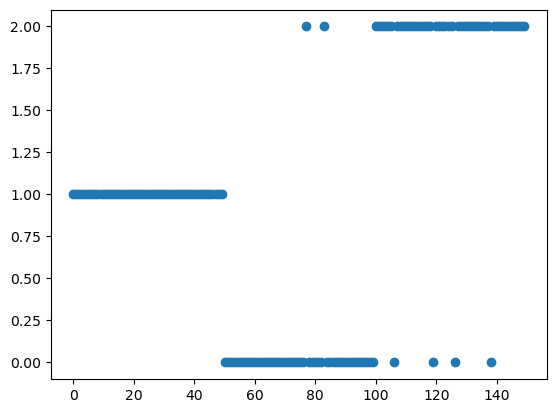

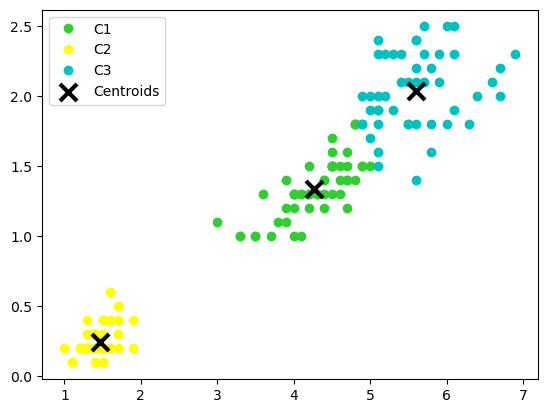

In [17]:
#iris dataset

meas=load_iris().data
X=meas[:,[2,3]] #όλα τα δεδομένα για τις 2 τελευταιες στήλες (3 και 4)

k=3
kmeans= KMeans(n_clusters=k).fit(X)
IDX= kmeans.labels_
C= kmeans.cluster_centers_

#Βημα 3
plt.figure(1)
plt.plot(IDX[:],'o')
plt.show()

showPlot(X,IDX,C)

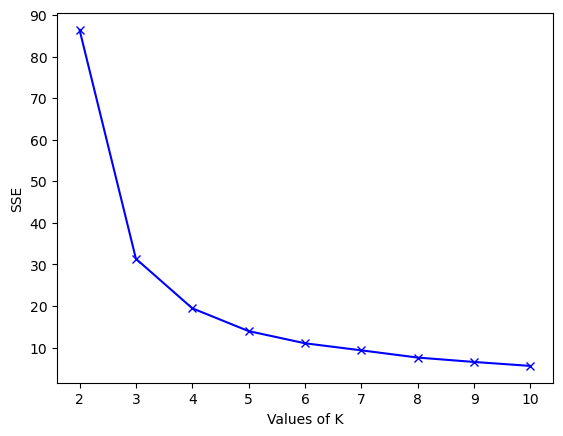

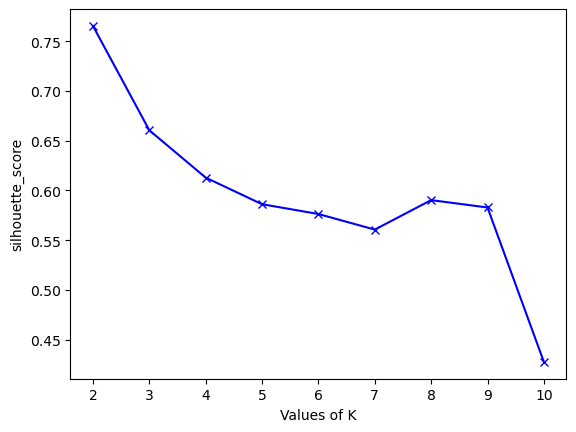

In [18]:
findK(X) #για τις στήλες 3 και 4

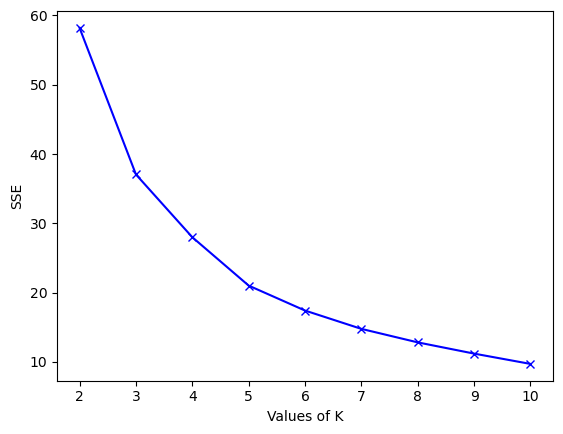

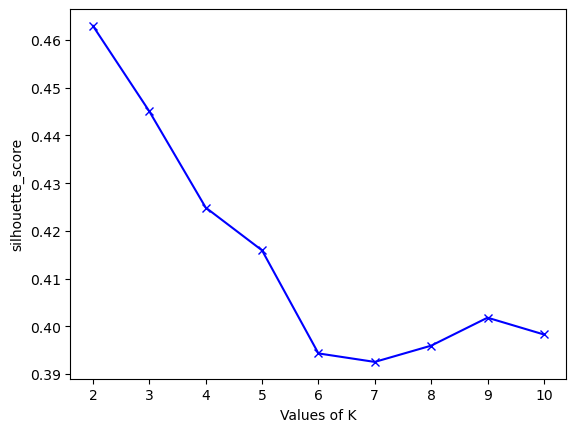

In [20]:
#Βημα 4
X=meas[:,[0,1]]#όλα τα δεδομένα για τις 2 πρώτες στήλες (1 και 2)
findK(X)

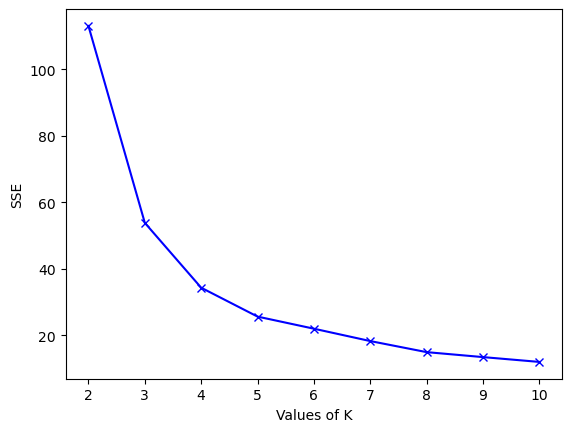

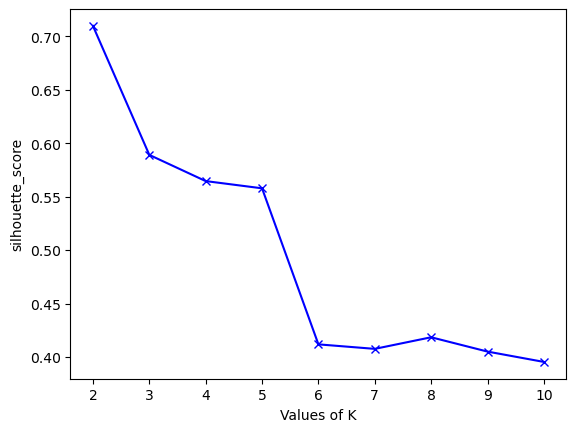

In [21]:
X=meas[:,[0,2]]#όλα τα δεδομένα για τις στήλες 1 και 3
findK(X)

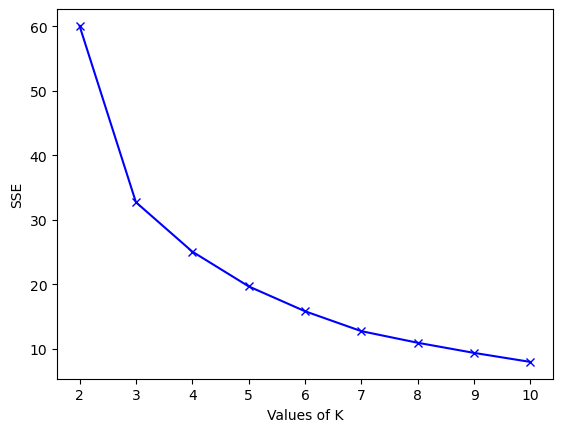

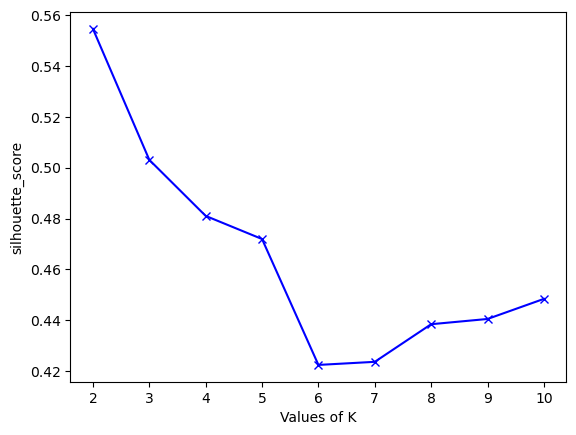

In [22]:
X=meas[:,[0,3]]#όλα τα δεδομένα για τις στήλες 1 και 4
findK(X)

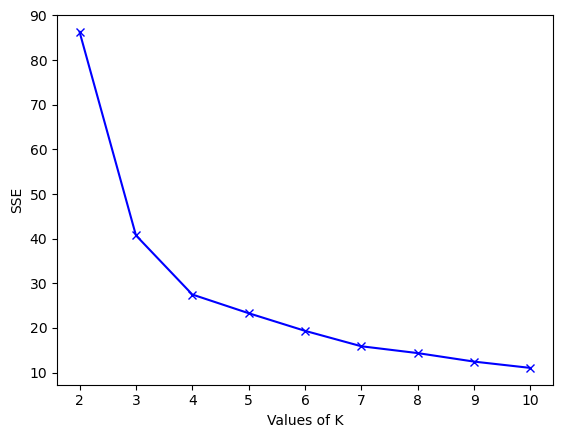

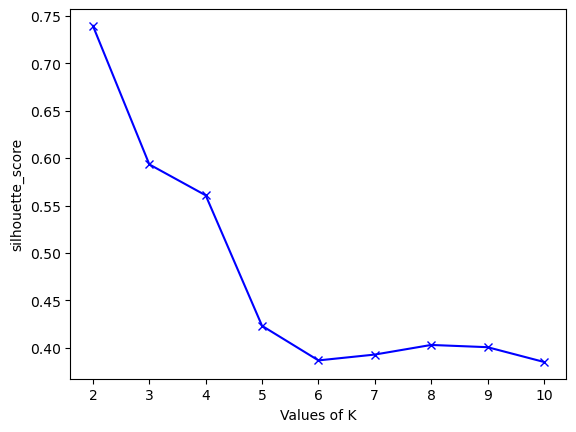

In [23]:
X=meas[:,[1,2]]#όλα τα δεδομένα για τις στήλες 2 και 3
findK(X)

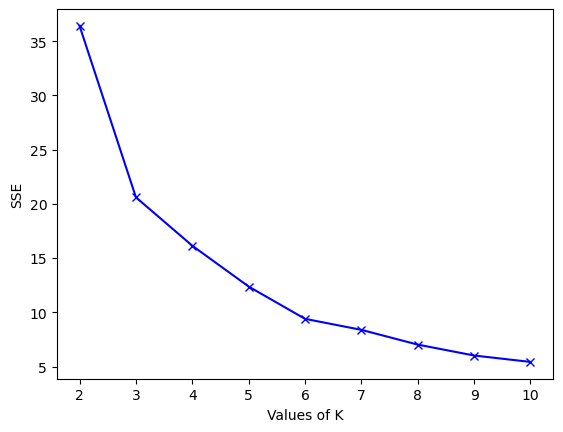

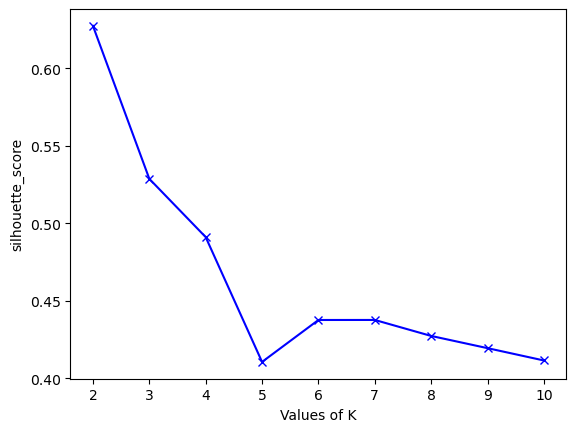

In [24]:
X=meas[:,[1,3]]#όλα τα δεδομένα για τις στήλες 2 και 4
findK(X)

# xV Dataset

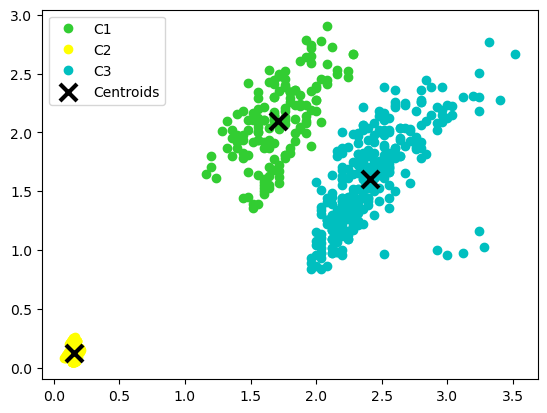

99.44939463705091


In [39]:
#xV dataset

mat_file= scipy.io.loadmat('xV.mat')
xV=np.array(mat_file['xV'])

# 'Βημα 2'
X= xV[:,[0,1]]
k=3
kmeans= KMeans(n_clusters=k).fit(X)
IDX= kmeans.labels_
C= kmeans.cluster_centers_

showPlot(X,IDX,C)

SSE_score= findSSE(X,k,IDX, C)
print(SSE_score)

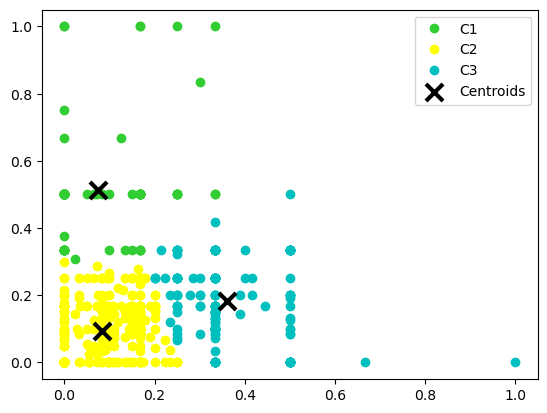

11.401819120120043


In [40]:
# 'Βήμα 3'
X= xV[:,[296,305]]
k=3
kmeans= KMeans(n_clusters=k).fit(X)
IDX= kmeans.labels_
C= kmeans.cluster_centers_

showPlot(X,IDX,C)
SSE_score= findSSE(X,k,IDX, C)
print(SSE_score)

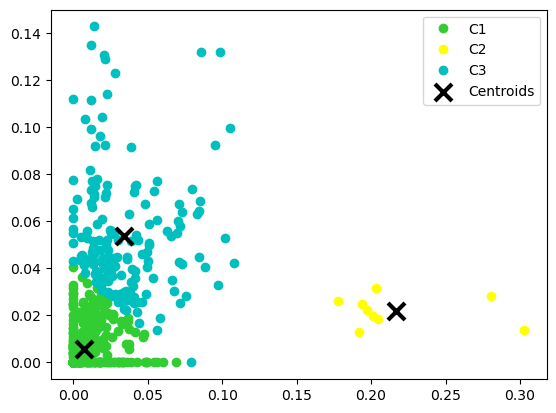

0.330020078971899


In [43]:
# Βήμα 4

X= xV[:,-2:]
k=3
kmeans= KMeans(n_clusters=k).fit(X)
IDX= kmeans.labels_
C= kmeans.cluster_centers_

showPlot(X,IDX,C)
SSE_score= findSSE(X,k,IDX, C)
print(SSE_score)

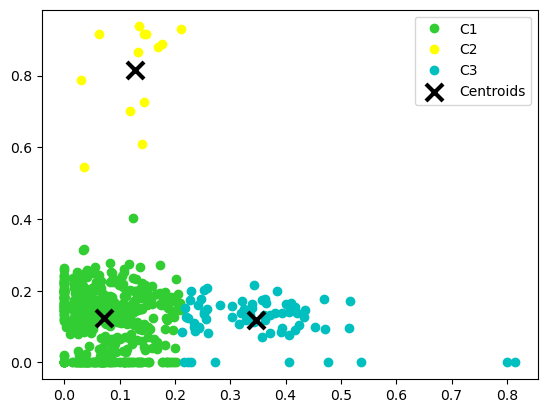

6.362905489884495


In [44]:
# 'Βημα 5'
X= xV[:,[205,175]]
k=3
kmeans= KMeans(n_clusters=k).fit(X)
IDX= kmeans.labels_
C= kmeans.cluster_centers_

showPlot(X,IDX,C)
SSE_score= findSSE(X,k,IDX, C)
print(SSE_score)